In [1]:
import tensorflow as tf
from tensorflow.python import keras
from tensorflow.python.keras import preprocessing
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, LSTM, Reshape

import numpy as np
import pandas

np.random.seed(10)
print (tf.__version__)

ImportError: cannot import name 'preprocessing' from 'tensorflow.python.keras' (C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\keras\__init__.py)

In [ ]:
data = pandas.read_csv('colors.csv')
data.head()

In [ ]:
len(data)

In [ ]:
names = data["name"]

## Visualize the name string length distribution

In [ ]:
h = sorted(names.str.len().as_matrix())
import numpy as np
import scipy.stats as stats
import pylab as plt

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)      #use this to draw histogram of your data
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()

In [ ]:
np.array(h).max()

## Tokenize, char level

In [ ]:
maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)

## One-hot encoding

In [ ]:
from keras.utils import np_utils
one_hot_names = np_utils.to_categorical(padded_names)
num_classes = one_hot_names.shape[-1]
num_classes

In [ ]:
one_hot_names.shape

In [ ]:
t.word_index

In [ ]:
# The RGB values are between 0 - 255
# scale them to be between 0 - 1
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(data["red"]), norm(data["green"]), norm(data["blue"])])


In [ ]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, num_classes)))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.summary()

In [32]:
model.load_weights('model_1.h5')

In [73]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.1)

Train on 12741 samples, validate on 1416 samples
Epoch 1/40
12741/12741 [==============================] - 35s 3ms/step - loss: 0.0602 - acc: 0.6276 - val_loss: 0.0599 - val_acc: 0.6695
Epoch 2/40
12741/12741 [==============================] - 31s 2ms/step - loss: 0.0552 - acc: 0.6589 - val_loss: 0.0568 - val_acc: 0.6405
Epoch 3/40
12741/12741 [==============================] - 31s 2ms/step - loss: 0.0526 - acc: 0.6633 - val_loss: 0.0548 - val_acc: 0.6688
Epoch 4/40
12741/12741 [==============================] - 31s 2ms/step - loss: 0.0503 - acc: 0.6630 - val_loss: 0.0527 - val_acc: 0.6589
Epoch 5/40
12741/12741 [==============================] - 30s 2ms/step - loss: 0.0481 - acc: 0.6690 - val_loss: 0.0508 - val_acc: 0.6794
Epoch 6/40
12741/12741 [==============================] - 30s 2ms/step - loss: 0.0460 - acc: 0.6688 - val_loss: 0.0481 - val_acc: 0.6787
Epoch 7/40
12741/12741 [==============================] - 30s 2ms/step - loss: 0.0438 - acc: 0.6795 - val_loss: 0.0475 - val_acc:

In [23]:
# Optionally continue to train with all data, this will likely overfit the training data.
model.fit(one_hot_names, normalized_values,
                    epochs=10,
                    batch_size=32)

Epoch 1/10
14157/14157 [==============================] - 35s 2ms/step - loss: 0.0112 - acc: 0.8073
Epoch 2/10
14157/14157 [==============================] - 35s 2ms/step - loss: 0.0085 - acc: 0.8152
Epoch 3/10
14157/14157 [==============================] - 34s 2ms/step - loss: 0.0075 - acc: 0.8210
Epoch 4/10
14157/14157 [==============================] - 34s 2ms/step - loss: 0.0070 - acc: 0.8222
Epoch 5/10
14157/14157 [==============================] - 33s 2ms/step - loss: 0.0068 - acc: 0.8286
Epoch 6/10
14157/14157 [==============================] - 33s 2ms/step - loss: 0.0065 - acc: 0.8269
Epoch 7/10
14157/14157 [==============================] - 34s 2ms/step - loss: 0.0065 - acc: 0.8342
Epoch 8/10
14157/14157 [==============================] - 32s 2ms/step - loss: 0.0063 - acc: 0.8353
Epoch 9/10
14157/14157 [==============================] - 34s 2ms/step - loss: 0.0061 - acc: 0.8374
Epoch 10/10
14157/14157 [==============================] - 34s 2ms/step - loss: 0.0061 - acc: 0.8380

In [24]:
# Save the model parameters for later use.
model.save_weights('model_1.h5')

In [5]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


NameError: name 'history' is not defined

In [2]:
# Plot a color image.
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [3]:
def scale(n):
    return int(n * 255) 

In [4]:
def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    one_hot = np_utils.to_categorical(padded, num_classes=num_classes)
    pred = model.predict(np.array(one_hot))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    one_hot = to_categorical(padded, num_classes-num_classes)
    pred = model.predict(np.array(one_hot))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

light blue, R,G,B: 184 234 242


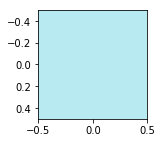

blue, R,G,B: 9 30 203


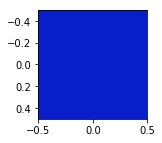

dark blue, R,G,B: 4 10 131


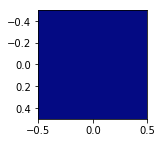

In [33]:
predict("light blue")
predict("blue")
predict("dark blue")

black, R,G,B: 22 17 28


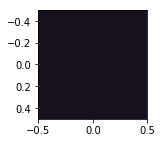

white, R,G,B: 241 241 231


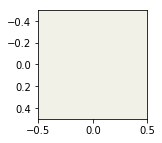

In [34]:
predict("black")
predict("white")

tensorflow orange, R,G,B: 227 106 51


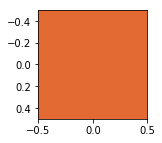

forest, R,G,B: 27 80 48


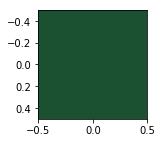

evergreen, R,G,B: 24 65 42


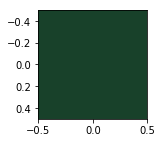

tangerine, R,G,B: 250 134 26


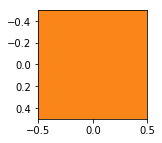

In [35]:
predict("tensorflow orange")
predict("forest")
predict("evergreen")
predict("tangerine")

princess ivory, R,G,B: 250 241 231


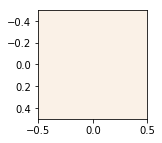

In [36]:
predict("princess ivory")

bull cream, R,G,B: 249 243 187


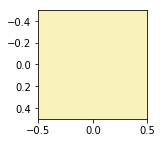

In [37]:
predict("bull cream")

keras red, R,G,B: 147 72 76


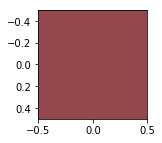

In [38]:
predict("keras red")

tensorflow orange, R,G,B: 227 106 51


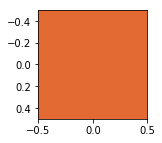

forest, R,G,B: 27 80 48


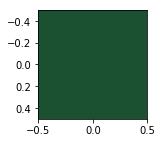

bull cream, R,G,B: 249 243 187


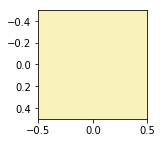

keras red, R,G,B: 147 72 76


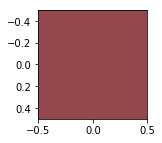

In [40]:
predict("tensorflow orange")
predict("forest")
predict("bull cream")
predict("keras red")